In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

##### Task 1 : Merge the 12 months of sales data into a single CSV file

In [2]:
df = pd.read_csv('./Sales_data_exercise/Sales_May_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [3]:
files = [file for file in os.listdir('./Sales_data_exercise')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_data_exercise/'+file)
    all_data = pd.concat([all_data,df])
all_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# Cleaning the data

all_data= all_data.dropna(how ='all')
all_data= all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Question 1 : What was the best month for sales? How much was earned that month?

In [23]:
# Creating Months feature

all_data['Months'] = all_data['Order Date'].str.split('/').str[0]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.900000,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.989998,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.000000,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.990000,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.990000,Los Angeles


In [12]:
# Convert Object data type to numeric
all_data['Price Each'] = all_data['Price Each'].astype('float32')
all_data['Quantity Ordered'] =all_data['Quantity Ordered'].astype('int32')
all_data['Months'] = all_data['Months'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float32
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Months            185950 non-null  int32  
dtypes: float32(1), int32(2), object(4)
memory usage: 9.2+ MB


In [14]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


In [15]:
Best_Months = all_data.groupby('Months')['Price Each'].sum().sort_values(ascending=False) 
Best_Months

Months
12    4588415.500
10    3715554.750
4     3367671.000
11    3180600.750
5     3135125.000
3     2791207.750
7     2632539.500
6     2562025.500
8     2230345.500
2     2188884.750
9     2084992.125
1     1811768.375
Name: Price Each, dtype: float32

In [16]:
Best_Months.values

array([4588415.5, 3715554.8, 3367671. , 3180600.8, 3135125. , 2791207.8,
       2632539.5, 2562025.5, 2230345.5, 2188884.8, 2084992.1, 1811768.4],
      dtype=float32)

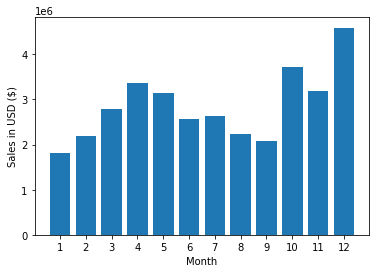

In [17]:
months = range(1,13)

plt.bar(Best_Months.index,Best_Months.values)

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

##### Question 2 : What city had the highest number of sales?

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


In [19]:
all_data['Cities'] = all_data['Purchase Address'].str.split(',').str[1]

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles


In [21]:
best_cities = all_data.groupby('Cities')['Sales'].sum().sort_values(ascending = False)
best_cities

Cities
 San Francisco    8262204.00
 Los Angeles      5452571.00
 New York City    4664317.50
 Boston           3661642.00
 Atlanta          2795498.50
 Dallas           2767975.50
 Seattle          2747755.50
 Portland         2320490.50
 Austin           1819581.75
Name: Sales, dtype: float32

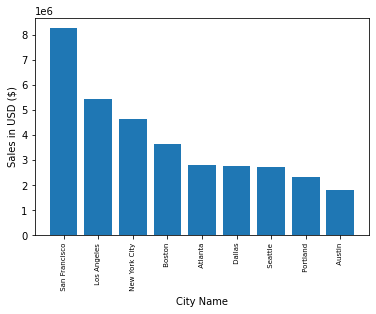

In [22]:
cities = best_cities.index
plt.bar(best_cities.index,best_cities.values)

plt.xticks(cities,rotation = 'vertical', size = 7)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

##### Question 3 : What time should we display advertisements to maximize likelihood of customer's buying product?

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.900000,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.989998,Boston,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000000,Los Angeles,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990000,Los Angeles,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.990000,Los Angeles,9


In [24]:
# Convert Object data type to datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.900000,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.989998,Boston,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000000,Los Angeles,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990000,Los Angeles,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.990000,Los Angeles,9


In [25]:
best_time = all_data.groupby('Hour')['Hour'].count()
best_time

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Hour, dtype: int64

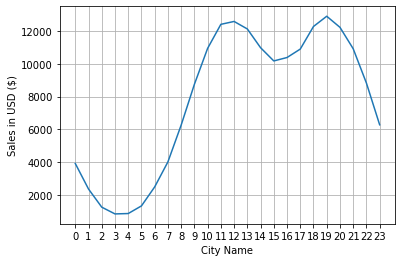

In [26]:
time = best_time.index
figsize = ( 20, 15)
plt.plot(best_time.index,best_time.values)

figsize = ( 20, 15)

plt.xticks(time)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.grid()
plt.show()

##### Question 4 : What products are most often sold together

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.900000,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.989998,Boston,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000000,Los Angeles,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990000,Los Angeles,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.990000,Los Angeles,9


In [29]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000000,Los Angeles,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990000,Los Angeles,14
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.000000,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.950000,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.989998,Boston,11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.840000,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.840000,Atlanta,20
11639,259314,Wired Headphones,1,11.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.990000,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.980000,Atlanta,0
11677,259350,Google Phone,1,600.000000,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.000000,San Francisco,13


In [30]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

<ipython-input-30-fe9ddc098ab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour,Grouped
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000000,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990000,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.000000,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.950000,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.989998,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [31]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [32]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

##### Question 5 : What product sold the most?

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.900000,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.989998,Boston,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.000000,Los Angeles,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.990000,Los Angeles,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.990000,Los Angeles,9


In [43]:
best_products = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False)
best_products

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

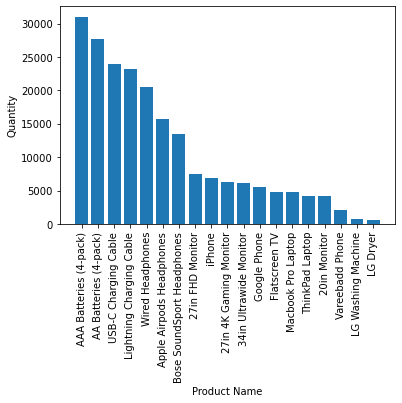

In [47]:
products = best_products.index
plt.bar(best_products.index,best_products.values)

plt.xticks(products,rotation = 'vertical', size = 10)
plt.ylabel('Quantity')
plt.xlabel('Product Name')
plt.show()

In [68]:
prices = all_data.groupby('Product')['Price Each'].mean()
prices = prices.loc[products]
prices

Product
AAA Batteries (4-pack)           2.990000
AA Batteries (4-pack)            3.840000
USB-C Charging Cable            11.950000
Lightning Charging Cable        14.950000
Wired Headphones                11.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
27in FHD Monitor               149.990005
iPhone                         700.000000
27in 4K Gaming Monitor         389.989990
34in Ultrawide Monitor         379.989990
Google Phone                   600.000000
Flatscreen TV                  300.000000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
20in Monitor                   109.989998
Vareebadd Phone                400.000000
LG Washing Machine             600.000000
LG Dryer                       600.000000
Name: Price Each, dtype: float32

<ipython-input-69-76edc83316cf>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical', size = 10)


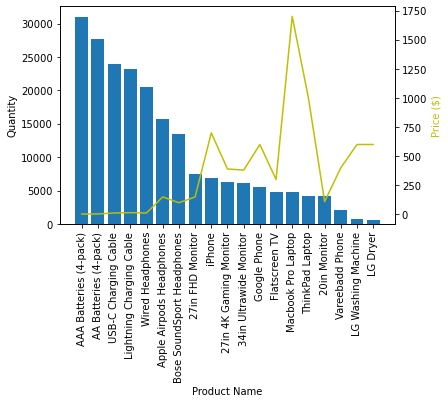

In [69]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(best_products.index,best_products.values)
ax2.plot(best_products.index, prices, 'b-', color = 'y')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price ($)', color = 'y')
ax1.set_xticklabels(products,rotation = 'vertical', size = 10)
plt.show()